In [3]:
!conda install -c pytorch pytorch

2 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - pytorch
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [4]:
%pip install -q torchviz

Note: you may need to restart the kernel to use updated packages.


In [5]:
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg" -O "mnist_0.jpg"
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg" -O "mnist_1.jpg"

In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [7]:
print("torch version : {}".format(torch.__version__))

torch version : 2.8.0


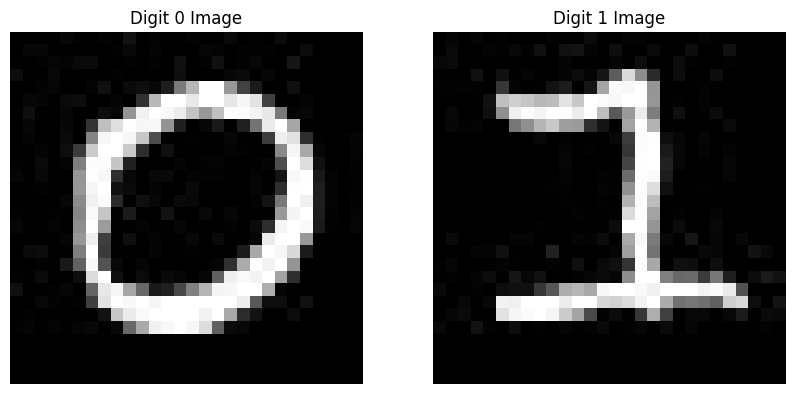

In [8]:
digit_0_array_og = cv2.imread("mnist_0.jpg")
digit_1_array_og = cv2.imread("mnist_1.jpg")

digit_0_array_gray = cv2.imread("mnist_0.jpg",cv2.IMREAD_GRAYSCALE )
digit_1_array_gray = cv2.imread("mnist_1.jpg",cv2.IMREAD_GRAYSCALE )

# Visualize the image

fig, axs = plt.subplots(1,2, figsize=(10,5))


axs[0].imshow(digit_0_array_og, cmap='gray',interpolation='none')
axs[0].set_title("Digit 0 Image")
axs[0].axis('off')

axs[1].imshow(digit_1_array_og, cmap="gray", interpolation = 'none')
axs[1].set_title("Digit 1 Image")
axs[1].axis('off')

plt.show()

In [9]:
#Numpy array with three channels
print("Image array shape: ",digit_0_array_og.shape)
print(f"Min pixel value:{np.min(digit_0_array_og)} ; Max pixel value : {np.max(digit_0_array_og)}")

Image array shape:  (28, 28, 3)
Min pixel value:0 ; Max pixel value : 255


In [10]:
# We will have a look at 28x28 single channel image's pixel values
digit_0_array_gray

array([[  0,   0,   0,   0,   7,   1,   0,   3,   0,  18,   0,   3,   0,
          0,   3,   0,   0,   9,   0,   2,   0,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   7,   7,   0,   0,   0,   0,   0,   2,   8,   0,   4,   0,
          0,   0,   6,   4,   0,   2,   3,   2,   0,   0,  11,   0,   0,
          0,   0],
       [  1,   0,   2,   6,   4,   9,   9,   0,   0,   2,   0,   3,   1,
         15,   0,   2,  16,   0,   2,   7,   0,   0,  22,   0,   0,   0,
          0,   0],
       [ 12,   0,   0,   8,   1,   0,   0,   0,   2,   0,   0,   0,   0,
         14,   0,   0,   0,   7,   9,   0,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   3,   5,   0,   0,   4,  16,   0,  10,  14,   6,  29,
        122, 182, 255, 255, 152,  66,  26,   0,   0,  15,   0,   0,   0,
          0,   0],
       [  0,   7,   5,   0,   9,  12,   0,   0,   4,   0,  49, 184, 255,
        255, 232, 255, 255, 231, 246, 227,  64,   0,   0,   4,   0,   0,
          0,   0],
       [  

Shape of Normalised Digit 0 Tensor:  torch.Size([28, 28, 3])
Normalised Min pixel value: 0.0 ; Normalised Max pixel value : 1.0


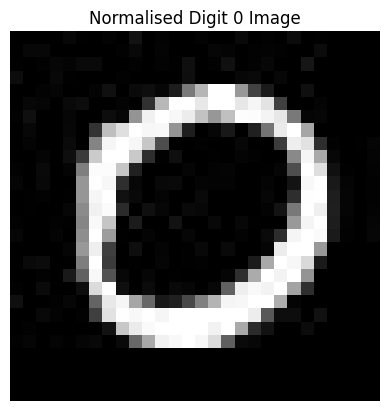

In [11]:
# Convert the images to PyTorch tensors and normalize
img_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32) / 255.0
img_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32) / 255.0

print("Shape of Normalised Digit 0 Tensor: ", img_tensor_0.shape)
print(f"Normalised Min pixel value: {torch.min(img_tensor_0)} ; Normalised Max pixel value : {torch.max(img_tensor_0)}")

plt.imshow(img_tensor_0,cmap="gray")
plt.title("Normalised Digit 0 Image")
plt.axis('off')
plt.show()

In [12]:
batch_tensor = torch.stack([img_tensor_0, img_tensor_1])

# In PyTorch the forward pass of input images to the model is expected to have a batch_size > 1
print("Batch Tensor Shape:", batch_tensor.shape)

Batch Tensor Shape: torch.Size([2, 28, 28, 3])


In [13]:
batch_input = batch_tensor.permute(0,3,1,2)
print("Batch Tensor Shape:", batch_input.shape)

Batch Tensor Shape: torch.Size([2, 3, 28, 28])


In [14]:
# Create a Tensor with just ones in a column
a = torch.ones(5)
# Print the tensor we created
print(a)

# Create a Tensor with just zeros in a column
b = torch.zeros(5)
print(b)

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0., 0., 0.])


In [15]:
c = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(c)

tensor([1., 2., 3., 4., 5.])


In [16]:
d = torch.zeros(3,2)
print(d)

e = torch.ones(3,2)
print(e)

f = torch.tensor([[1.0, 2.0],[3.0, 4.0]])
print(f, "f")

# 3D Tensor
g = torch.tensor([[[1., 2.], [3., 4.]], [[5., 6.], [7., 8.]]])
print(g, "g")

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 2.],
        [3., 4.]]) f
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]]) g


In [17]:
print(f.shape)

print(e.shape)

print(g.shape)

torch.Size([2, 2])
torch.Size([3, 2])
torch.Size([2, 2, 2])


In [18]:
# All indices starting from 0

# Get element at row 1, column 0
print(f[1,0])

# We can also use the following
print(f[1][0])

# Similarly for 3D Tensor
print(g[1,0,0])
print(g[1][0][0])

tensor(3.)
tensor(3.)
tensor(5.)
tensor(5.)


In [19]:
# All elements
print(f[:])

# All elements from index 1 to 2 (excluding element 3)
print(c[1:3])

# All elements till index 4 (exclusive)
print(c[:4])

# First row
print(f[0, :])

# Second column
print(f[:,1])

tensor([[1., 2.],
        [3., 4.]])
tensor([2., 3.])
tensor([1., 2., 3., 4.])
tensor([1., 2.])
tensor([2., 4.])


In [20]:
# Tensor to Array
f_numpy = f.numpy()
print(f_numpy)

# Array to Tensor
h = np.array([[8,7,6,5],[4,3,2,1]])
h_tensor = torch.from_numpy(h)
print(h_tensor)

[[1. 2.]
 [3. 4.]]
tensor([[8, 7, 6, 5],
        [4, 3, 2, 1]])


In [21]:
# Create tensor
tensor1 = torch.tensor([[1,2,3],[4,5,6]])
tensor2 = torch.tensor([[-1,2,-3],[4,-5,6]])

# Addition
print(tensor1+tensor2)
# We can also use
print(torch.add(tensor1,tensor2))

# Subtraction
print(tensor1-tensor2)
# We can also use
print(torch.sub(tensor1,tensor2))

# Multiplication
# Tensor with Scalar
print(tensor1 * 2)

# Tensor with another tensor
# Elementwise Multiplication
print(tensor1 * tensor2)

# Matrix multiplication
tensor3 = torch.tensor([[1,2],[3,4],[5,6]])
print(torch.mm(tensor1,tensor3))

# Division
# Tensor with scalar
print(tensor1/2)

# Tensor with another tensor
# Elementwise division
print(tensor1/tensor2)

tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
tensor([[ -1,   4,  -9],
        [ 16, -25,  36]])
tensor([[22, 28],
        [49, 64]])
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])
tensor([[-1.,  1., -1.],
        [ 1., -1.,  1.]])


In [22]:
# Create two 1-dimensional tensors
a = torch.tensor([1, 2, 3])
b = torch.tensor([4])

# adding a scalar to a vector
result = a + b

print("Result of Broadcasting:\n",result)

Result of Broadcasting:
 tensor([5, 6, 7])


In [23]:
# Create two tensors with shapes (1, 3) and (3, 1)
a = torch.tensor([[1, 2, 3]])
b = torch.tensor([[4], [5], [6]])

# adding tensors of different shapes
result = a + b
print("Shape: ", result.shape)
print("\n")
print("Result of Broadcasting:\n", result)

Shape:  torch.Size([3, 3])


Result of Broadcasting:
 tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


In [ ]:
# Create a tensor for CPU
# This will occupy CPU RAM
tensor_cpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cpu')

# Create a tensor for GPU
# This will occupy GPU RAM and does not work on MAC with M1/M2 chips
tensor_gpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cuda')

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
import torch
print(torch.cuda.is_available())

False
